# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

In [1]:
# FAURE Guillaume 21108390
# LUCAS Garance 21200408

In [2]:
#%pip install lime
#stabilité des résultats, attribut corrélé, 

# TME 03 - Opérateurs d'agrégation et LIME

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A - Opérateurs d'agrégation

<div class="alert alert-block alert-warning">
L'objet de la 1ère partie de TME est de tracer les lignes de niveaux des opérateurs d'agrégation vus en cours
</div>

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule la moyenne pondérée d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [13]:
def moyenne_pondérée(x, w):
    return np.dot(x, w) 

In [20]:
poids = np.array ([1/10, 9/10])
x = np.array( [1, 2])
moyenne_p = moyenne_pondérée(x, poids)
print(moyenne_p)


1.9000000000000001


<div class="alert alert-block alert-info">
    Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
</div>

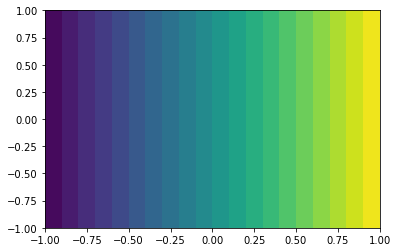

In [81]:
# Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
def lignes_niveaux(opérateur, x1_min, x1_max, x2_min, x2_max, nb_points = 200, nb_ligne=20):
    x1 = np.linspace(x1_min, x1_max, nb_points)
    x2 = np.linspace(x2_min, x2_max, nb_points)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.array([X1, X2])
    Z = np.zeros((nb_points, nb_points))
    for i in range(nb_points):
        for j in range(nb_points):
            Z[i,j] = opérateur(X[:, i, j])
    plt.contourf(X1, X2, Z, nb_ligne)

lignes_niveaux(lambda x: moyenne_pondérée(x, poids), -1, 1, -1, 1)


<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule un OWA d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [82]:
def OWA(x, w):
    return np.sort(x) @ w

1.9000000000000001


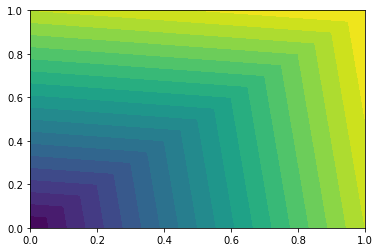

In [83]:
poids = np.array ([1/10, 9/10])
x = np.array( [1, 2])
print(OWA(x, poids))
lignes_niveaux(lambda x: OWA(x, poids), 0, 1, 0, 1)

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes configurations des moyennes pondérées et des OWA pour différents vecteurs de poids.    
</div>

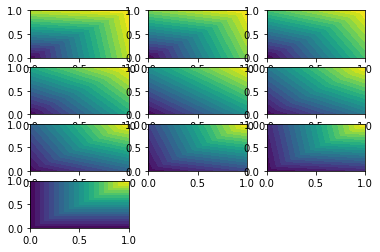

In [84]:
for i in range (1, 11):
    plt.subplot(4, 3, i )
    poids = np.array ([i/10, 1-i/10])
    lignes_niveaux(lambda x: OWA(x, poids), 0, 1, 0, 1)
plt.show()

<div class="alert alert-block alert-info">
    Visualiser aussi les lignes de niveaux des opérateurs conjonctifs et disjonctifs vus en cours, ainsi que l'opérateur à comportement variable (intégrale de Gödel), après avoir défini les fonctions permettant de calculer ces opérateurs.
</div>

In [89]:
#conjonctif
def min_conj(u,v):
    return np.minimum(u,v)
def max_conj(u,v):
    return max(u+v-1,0)
def mult(u,v):
    return u*v


#disjonctif
def max_dis(u,v):
    return np.maximum(u,v)
def plus_mul(u,v):
    return u+v-u*v
def min_dis(u,v):
    return min(u+v,1)

# compromis
def moyenne(x):
    return np.sum(x)/len(x)


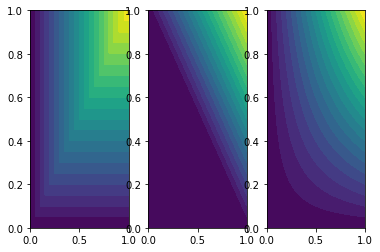

In [90]:
plt.subplot(1, 3, 1 )
lignes_niveaux(lambda x: min_conj(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 2 )
lignes_niveaux(lambda x: max_conj(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 3 )
lignes_niveaux(lambda x: mult(*x), 0, 1, 0, 1)

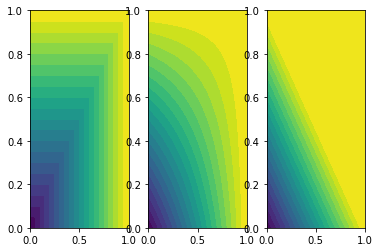

In [87]:
plt.subplot(1, 3, 1 )
lignes_niveaux(lambda x: max_dis(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 2 )
lignes_niveaux(lambda x: plus_mul(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 3 )
lignes_niveaux(lambda x: min_dis(*x), 0, 1, 0, 1)

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule l'intégrale de Choquet d'un vecteur <code>x</code> en fonction d'une capacité <code>mu</code>.<br>
    La fonction ne doit pas imposer de restriction au nombre de composantes de <code>x</code>, sa documentation doit expliciter la représentation choisie pour <code>mu</code>, la fonction doit inclure une vérification que <code>mu</code> satisfait les propriétés d'une capacité.
    
</div>

In [98]:
def choquet(x,mu):
    n = len(x)
    arg_x = np.argsort(x)
    sig_x = np.sort(x)
    A_sigma = {}
    for i in range(n):
        A_sigma[i] = np.sum(mu[arg_x[i]:arg_x[i+1]+1])

    return 

print(choquet([18,15,12], [0,0.5,0.9,1]))

IndexError: index 3 is out of bounds for axis 0 with size 3

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes intégrales de Choquet, pour différentes valeurs des paramètres. 
</div>

<div class="alert alert-block alert-info">
    Commenter les résultats obtenus. 
</div>

<div>
</div>

In [15]:
# Commentaire :

## B - LIME

<div class="alert alert-block alert-warning">
L'objet de cette 2ème partie de TME est de tester l'algorithme LIME sur une tâche de classification assez simple.
</div>

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
    Nous allons utiliser les datasets <code>half-moons</code>, que vous savez manipuler, pour permettre la visualisation des résultats et <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> qui comporte plus d'attributs.
</div>

<div class="alert alert-block alert-info">
    Tout d'abord, exécuter le bloc ci-dessous pour importer la bibliothèque <code>datasets</code> de <code>sklearn</code>.
</div>

In [2]:
from sklearn import datasets

<div class="alert alert-block alert-info">
    Exécuter le bloc suivant pour charger les données <code>breast_cancer</code>.
 </div>

In [3]:
breast_cancer = datasets.load_breast_cancer()

<div class = "alert alert-block alert-info">
    Q1.1 - Visualiser le contenu de la variable <code>breast_cancer</code>.
</div>

<div class = "alert alert-block alert-info">
    Q1.2 - Définir les variables <code>X_train, X_test, y_train, y_test</code> avec <code>train_test_split</code> où vous utiliserez 25% des données pour le test.
</div>

(array([[1.185e+01, 1.746e+01, 7.554e+01, ..., 9.140e-02, 3.101e-01,
         7.007e-02],
        [1.122e+01, 1.986e+01, 7.194e+01, ..., 2.022e-02, 3.292e-01,
         6.522e-02],
        [2.013e+01, 2.825e+01, 1.312e+02, ..., 1.628e-01, 2.572e-01,
         6.637e-02],
        ...,
        [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
         8.136e-02],
        [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
         6.559e-02],
        [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
         8.732e-02]]),
 array([[1.340e+01, 2.052e+01, 8.864e+01, ..., 2.051e-01, 3.585e-01,
         1.109e-01],
        [1.321e+01, 2.525e+01, 8.410e+01, ..., 6.005e-02, 2.444e-01,
         6.788e-02],
        [1.402e+01, 1.566e+01, 8.959e+01, ..., 8.216e-02, 2.136e-01,
         6.710e-02],
        ...,
        [1.234e+01, 1.227e+01, 7.894e+01, ..., 1.070e-01, 3.110e-01,
         7.592e-02],
        [1.353e+01, 1.094e+01, 8.791e+01, ..., 7.407e-02, 2.710e-01,
   

<div class = "alert alert-block alert-info">
    Q1.3 - Définir la variable <code>feature_names</code> contenant la liste des caractéristiques dans ce dataset ainsi que les noms de classes dans la variable <code>target_names</code>.
</div>

## 2 - Apprentissage d'un modèle linéaire

<div class="alert alert-block alert-warning">
Nous allons apprendre la tâche de classification en utilisant un modèle de régression logistique.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Apprendre un modèle <code>logreg</code> de régression logistique sur les données.
</div>

LogisticRegression(class_weight='balanced', max_iter=10000)

<div class = "alert alert-block alert-info">
    Q2.2 - Dans <code>y_pred</code>, calculer les prédictions sur les données de test.
</div>

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>confusion_matrix</code>, donner la matrice de confusion sur les données de test.
</div>

array([[52,  1],
       [ 7, 83]])

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>f1_score</code>, calculer le score f1.
</div>

In [11]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')

0.9540229885057472

<div class = "alert alert-block alert-info">
    Q2.4 - En utilisant les labels des caractéristiques du dataset, dessiner un diagramme en barre de l'importance de chaque caractéristique apprise par la régression logistique.
</div>

<AxesSubplot: >

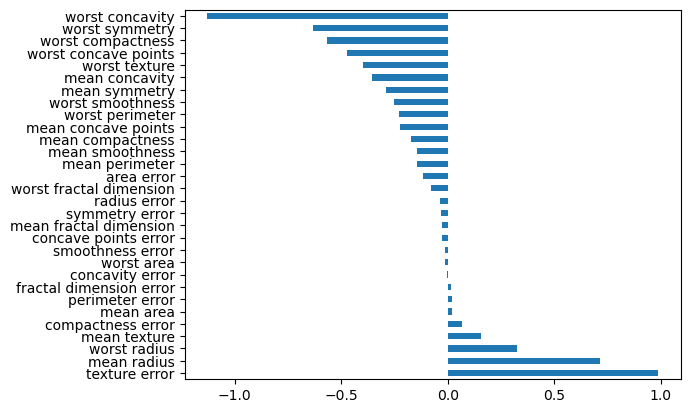

In [12]:
import pandas as pd
coefs = logreg.coef_[0]
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

<div class = "alert alert-block alert-info">
    Q2.5 - De la même manière, donner les importances du premier exemple de la base de test.
</div>

<AxesSubplot: >

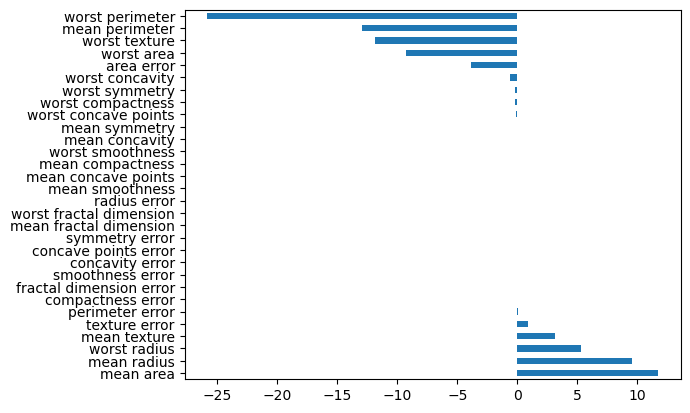

## 3 - Explication avec LIME

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par LIME.
</div>

<div class = "alert alert-block alert-info">
    Q3.1 - Exécuter le bloc ci-dessous pour obtenir une explication sur le premier exemple de la base de test. Commentez.
</div>

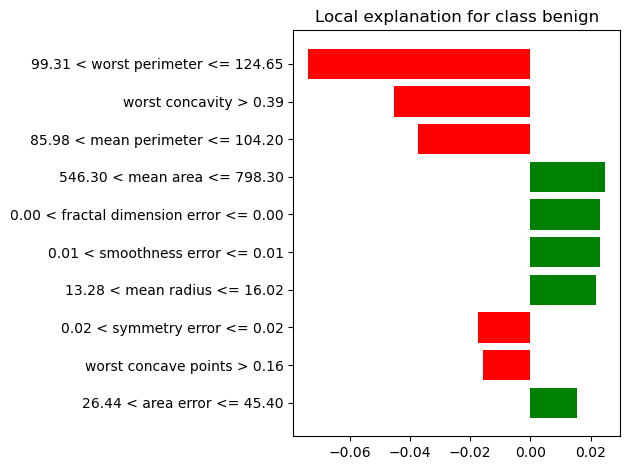

In [14]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(X_test[0], logreg.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

In [15]:
# Commentaire :

<div class = "alert alert-block alert-info">
    Q3.2 - Comparer avec l'exemple suivant de la base de test.
</div>

## 4 - Expérimentations

<div class="alert alert-block alert-info">
    Faire des tests pour examiner le comportement de LIME, par exemple pour examiner sa stabilité par rapport à la donné d'intérêt ou par rapport au classifieur, selon un protocole que vous définirez après avoir spécifié l'étude que vous souhaitez mener.
</div>

## 5 - Données textuelles

<div class="alert alert-block alert-warning">
    Nous allons apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME pour obtenir des explications sur la classification d'exemples.
</div>

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

<div class = "alert alert-block alert-info">
Utilisez LIME pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>

## 6 - Implémentation de LIME

<div class="alert alert-block alert-info">
    Sur des données textuelles, implémentez une version rudimentaire de LIME en utilisant la fonction de proximité proposée dans le cours. Retrouvez-vous les mêmes vecteurs d'importance qu'avec la bibliothèque LIME ?
</div>